In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
%matplotlib inline

## The Dataset

This dataset comes from Kaggle https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009. Is a dataset with 1599 wines and 13 columns. This dataset shows several features on different qualities of wine and also gives the quality of each wine, so I am able to view how well my model performed.

In [10]:
df= pd.read_csv('winequality-red.csv')

## Explore

In [106]:
df.shape

(1599, 13)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [34]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
null_count = df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

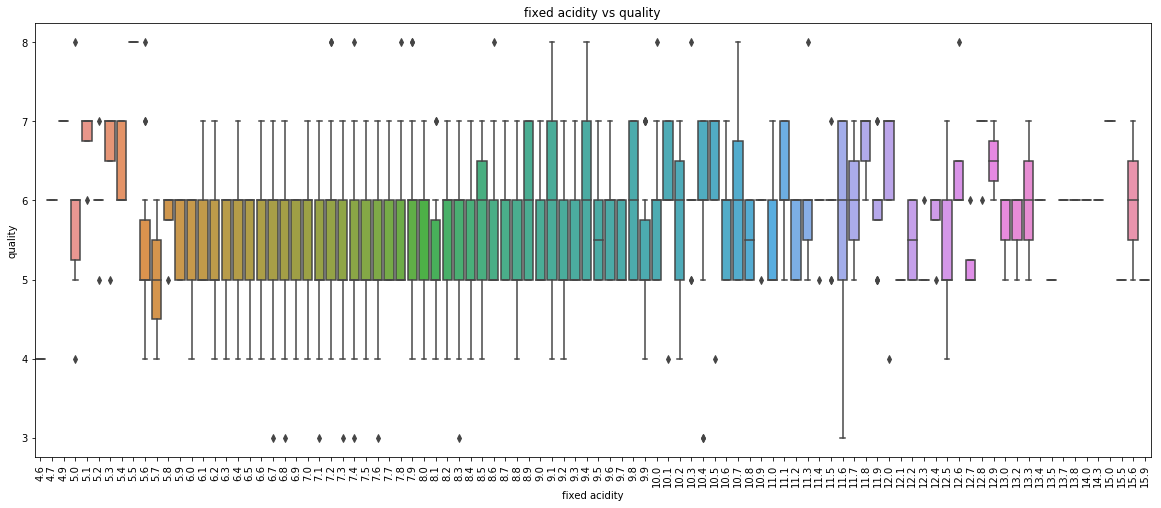

In [20]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='fixed acidity', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('fixed acidity vs quality')
plt.show()

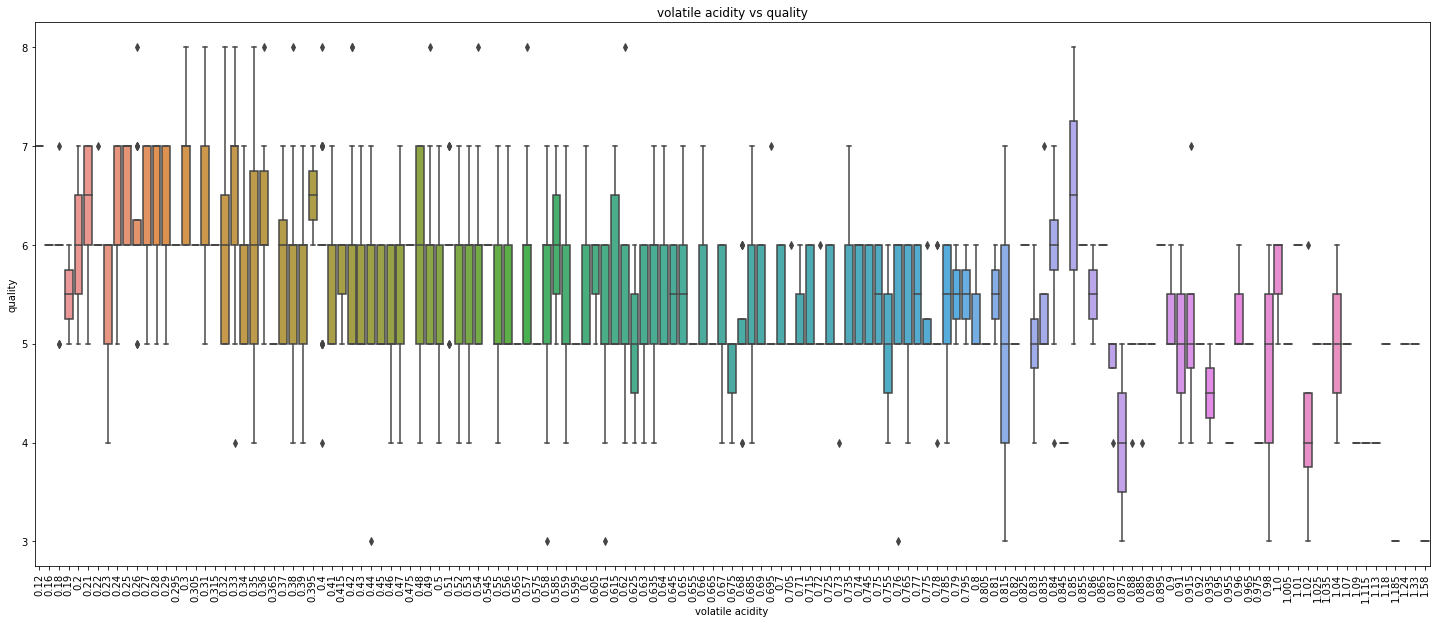

In [22]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='volatile acidity', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('volatile acidity vs quality')
plt.show()

This graph is showing more of the wines with lower volatile acidity are of higher quality. The higher volatile acidity levels are of less quality

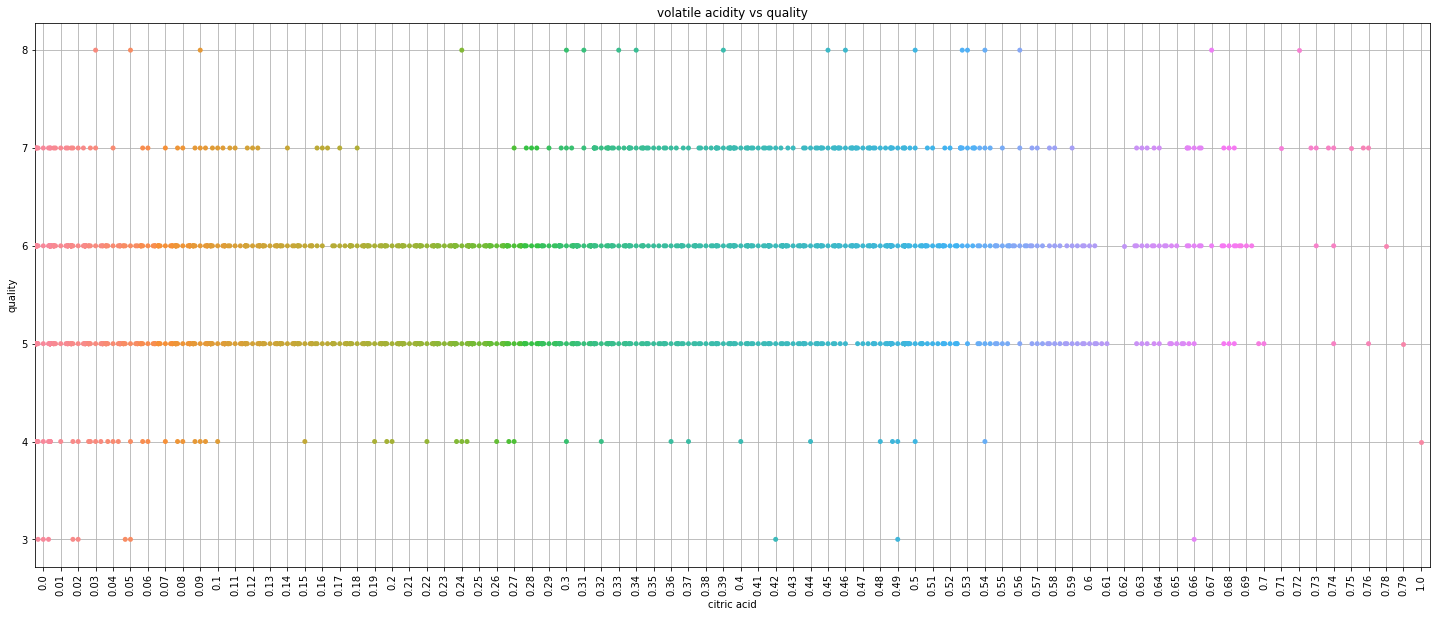

In [105]:
plt.figure(figsize=(25, 10))
sns.swarmplot(x='citric acid', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('volatile acidity vs quality')
plt.grid(True)
plt.show()

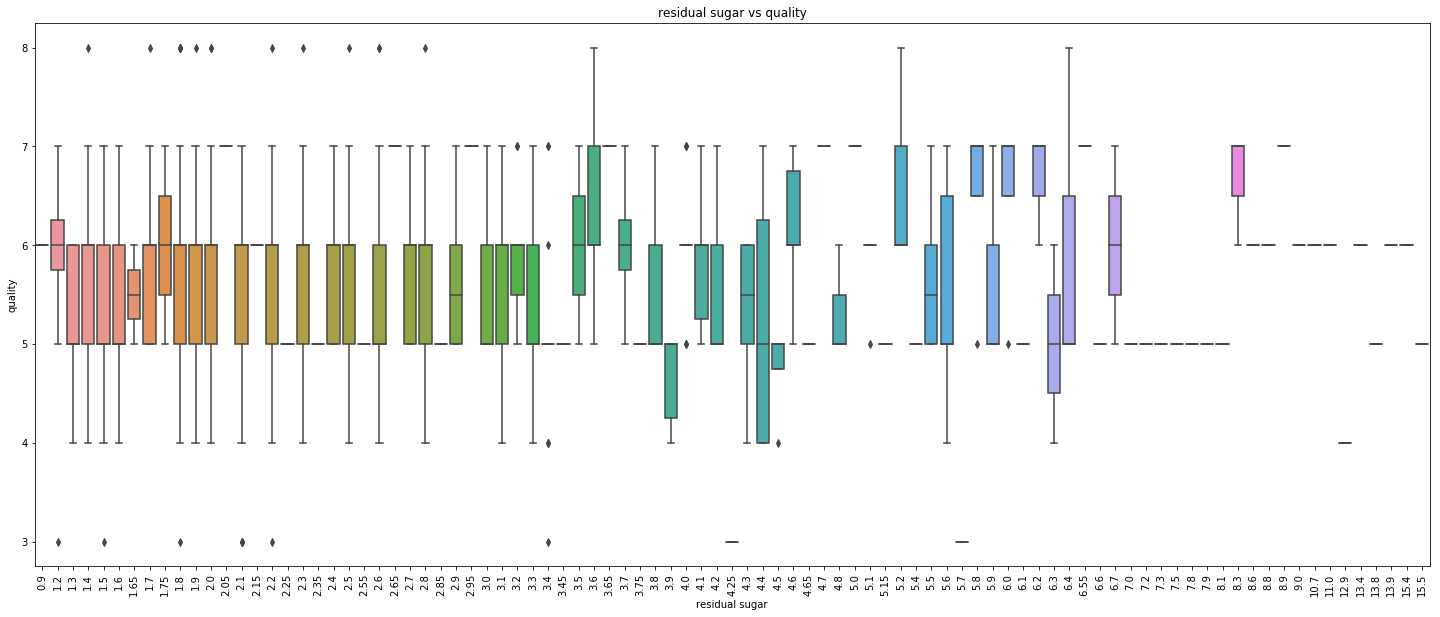

In [24]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='residual sugar', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('residual sugar vs quality')
plt.show()

higher quality wines have a tendency to having more sugar

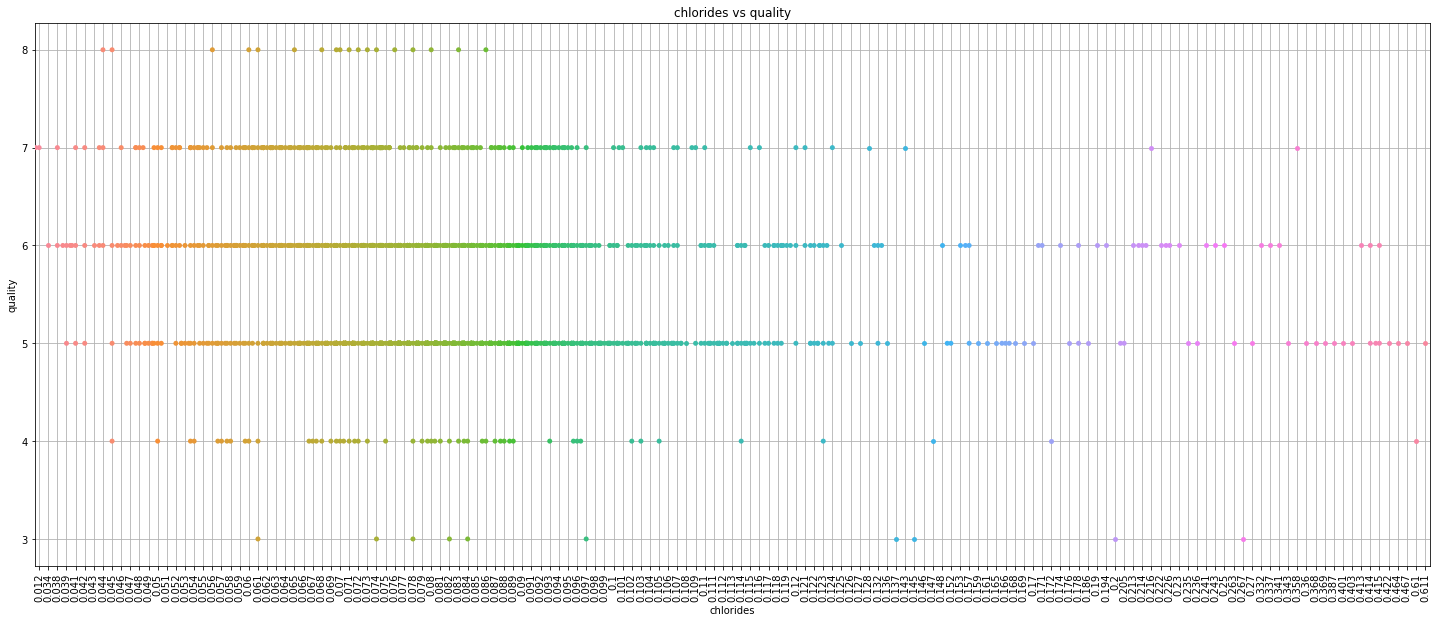

In [102]:
plt.figure(figsize=(25, 10))
sns.swarmplot(x='chlorides', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('chlorides vs quality')
plt.grid(True)
plt.show()

From the data provided the wines with higher quality exclusively have lower chlorides

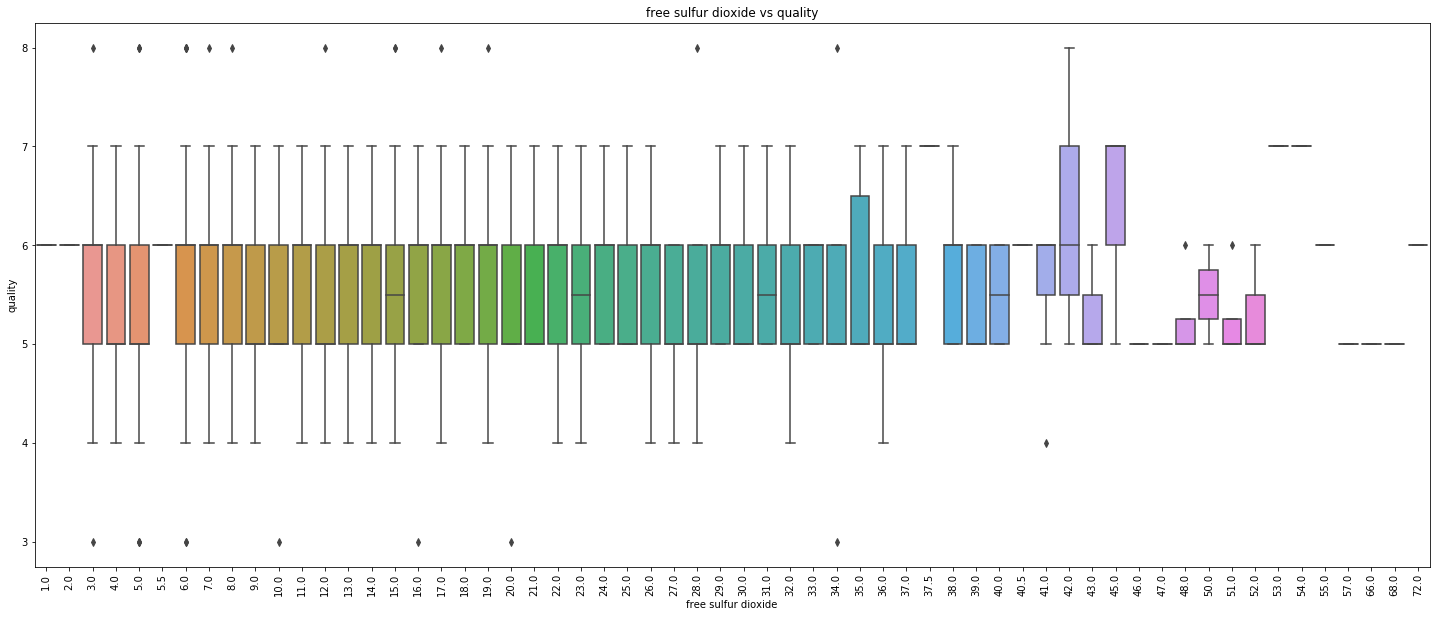

In [26]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='free sulfur dioxide', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('free sulfur dioxide vs quality')
plt.show()

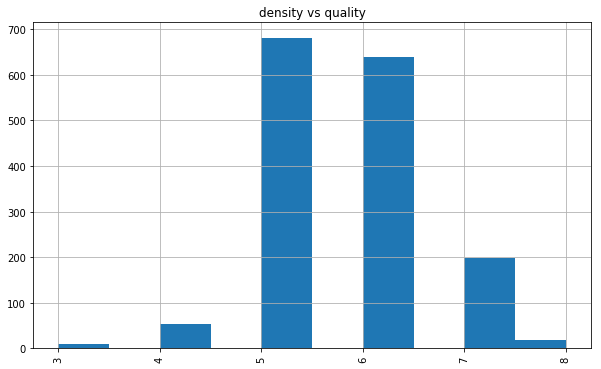

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['quality'])
plt.xticks(rotation = 90)
plt.xlabel('Quality')
plt.ylabel('Quantity')
plt.title('quantity of each quality')
plt.grid(True)
plt.show()

Even though the quality is supposed to go to 10 the higher quality shown is 8

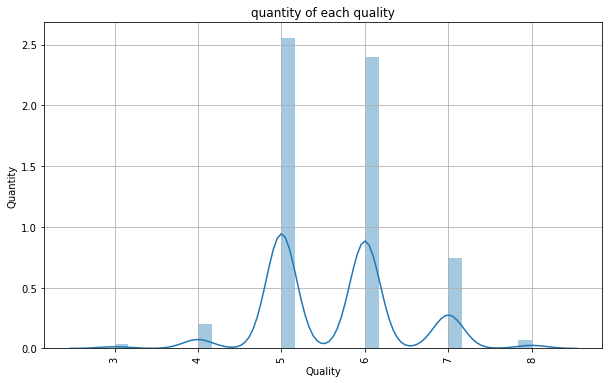

In [56]:
plt.figure(figsize=(10, 6))
sns.distplot(df['quality'])
plt.xticks(rotation = 90)
plt.xlabel('Quality')
plt.ylabel('Quantity')
plt.title('quantity of each quality')
plt.grid(True)
plt.show()

It is very easy to see that 5 and 6 are by far the most common quality. Also notice that there are no quality wines in this  dataset higher than 8 and none lower than 3. 

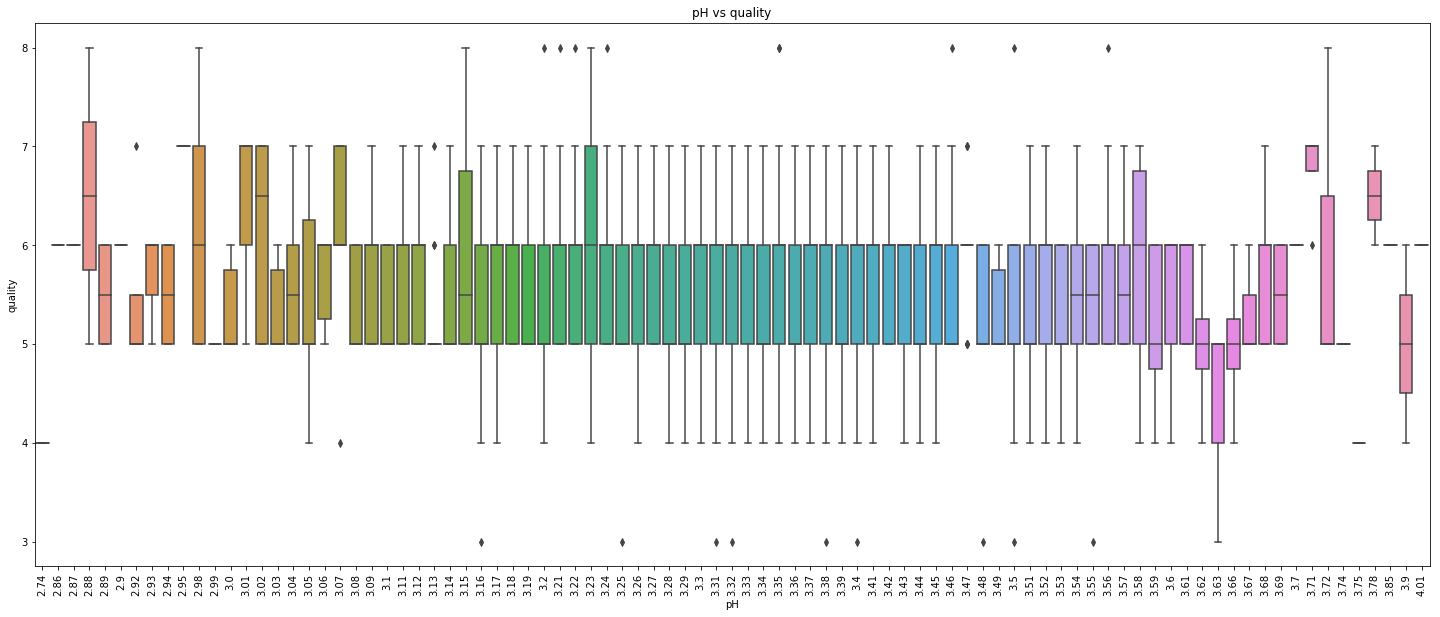

In [46]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='pH', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('pH vs quality')
plt.show()

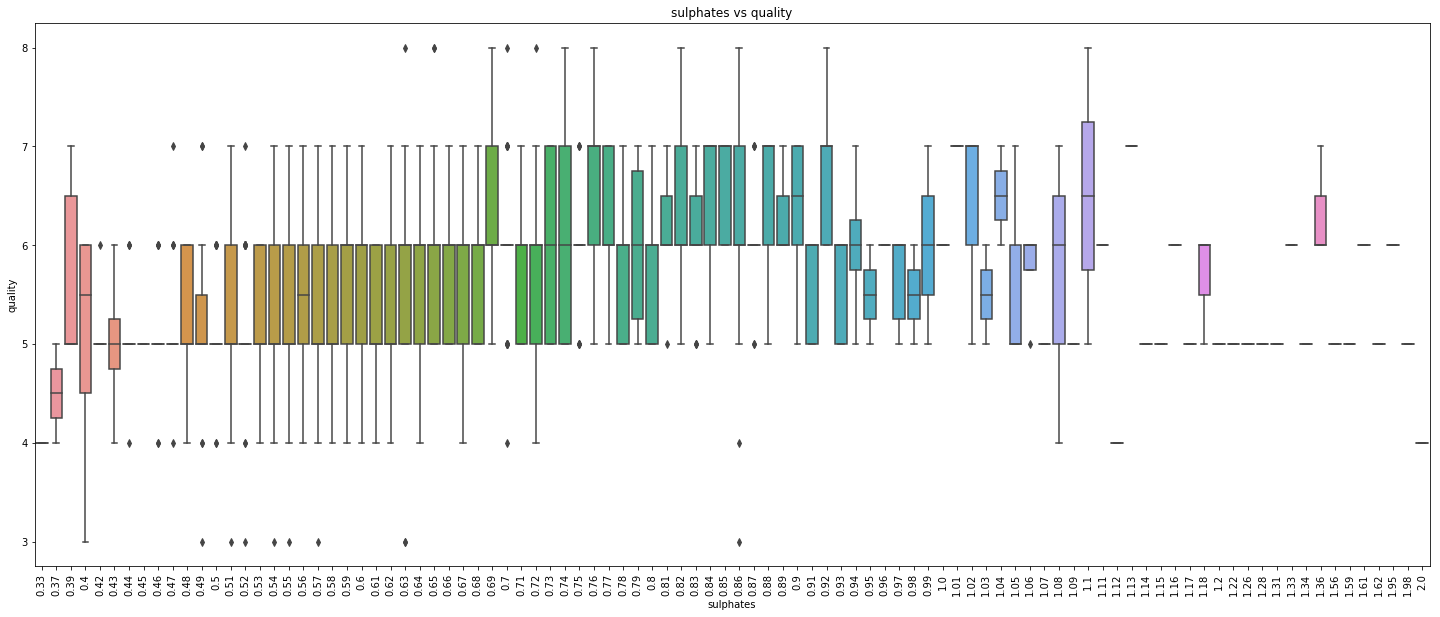

In [45]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='sulphates', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('sulphates vs quality')
plt.show()

It appears as though, wines with lower sulphates are not among the higher quality

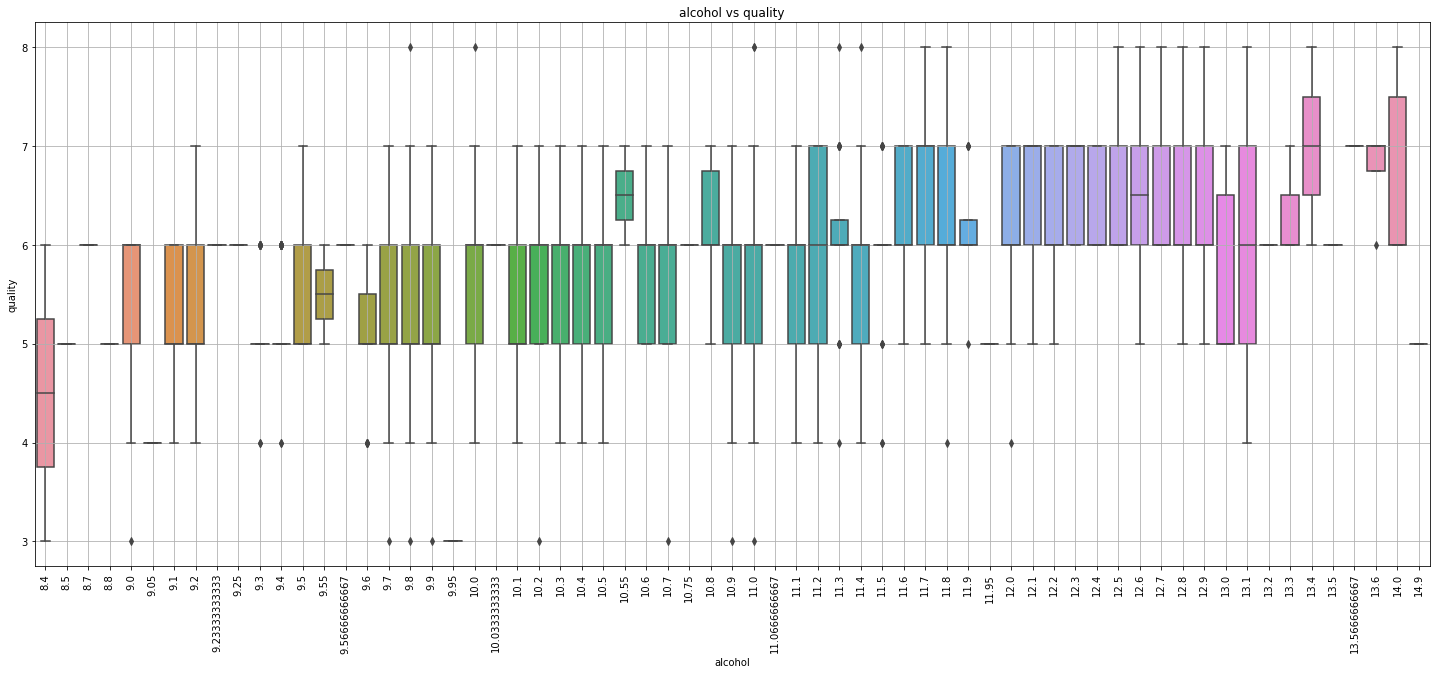

In [49]:
plt.figure(figsize=(25, 10))
sns.boxplot(x='alcohol', y='quality', data = df)
plt.xticks(rotation = 90)
plt.title('alcohol vs quality')
plt.grid(True)
plt.show()

From all the graphs I am seeing that alcohol content is a big factor in the quality. After 11.6 alcohol content, most of the wines are rated a higher quality than its peers. 

## Models and Tuning

### Neural Network

In [65]:
## I am adding a new feature that identifies whether the wine is of good quality or not
df['good_quality'] = np.where(df['quality'] >=7, 1, 0)

# Determines class balance
print('Class balance:', df['top_quality'].mean())

Class balance: 0.1357098186366479


In [66]:
y =df['good_quality']
X = df.drop(['quality', 'good_quality'], 1)

In [67]:
mlp_params = {'hidden_layer_sizes':range(1, 100),
         'activation': ('identity', 'logistic', 'tanh', 'relu'),
         'learning_rate': ('constant', 'invscaling', 'adaptive'),
         'max_features': ('sqrt', 'log2') }

In [68]:
mlp = MLPClassifier()
mlp_gs = GridSearchCV(mlp, mlp_params, return_train_score=True, n_jobs =-1)
mlp_gs.fit(X,y)

print(mlp_gs.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': 75, 'learning_rate': 'constant'}


In [98]:
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes= 75, learning_rate = 'constant')
cross_val_score(mlp, X, y, cv=5)

array([ 0.87538941,  0.86915888,  0.87460815,  0.84952978,  0.86833856])

In [100]:
mlp.fit(X,y)
mlp.score(X, y)

0.86866791744840521

In [90]:
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes= (75, 40), learning_rate = 'constant')
cross_val_score(mlp, X, y, cv=5)

array([ 0.88161994,  0.83489097,  0.90282132,  0.8338558 ,  0.84012539])

In [91]:
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes= (75, 30), learning_rate = 'constant')
cross_val_score(mlp, X, y, cv=5)

array([ 0.86604361,  0.84423676,  0.88401254,  0.85266458,  0.86833856])

In [92]:
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes= (75, 20), learning_rate = 'constant')
cross_val_score(mlp, X, y, cv=5)

array([ 0.89096573,  0.82242991,  0.89655172,  0.84012539,  0.85893417])

In [93]:
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes= (75, 10), learning_rate = 'constant')
cross_val_score(mlp, X, y, cv=5)

array([ 0.87538941,  0.86292835,  0.90595611,  0.87460815,  0.86520376])

In [94]:
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes= (75, 2), learning_rate = 'constant')
cross_val_score(mlp, X, y, cv=5)

array([ 0.86292835,  0.86292835,  0.90595611,  0.86520376,  0.86520376])

In [95]:
mlp = MLPClassifier(activation ='tanh', hidden_layer_sizes= (75, 5), learning_rate = 'constant')
cross_val_score(mlp, X, y, cv=5)

array([ 0.87538941,  0.87850467,  0.89968652,  0.8369906 ,  0.86206897])

### Random forest

In [70]:
rfr_params = {'n_estimators':range(1, 100,1),
         'max_depth': range(2, 25),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [73]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y)

print(rfr_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 'log2', 'n_estimators': 86}


In [74]:
rfr = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= 16, n_estimators= 86, max_features = 'log2')
cross_val_score(rfr, X, y, cv=5)

array([ 0.87850467,  0.86915888,  0.87774295,  0.84952978,  0.88087774])

In [80]:
rfr.fit(X,y)
forest_features = pd.DataFrame()
forest_features['importance'] = rfr.feature_importances_
forest_features['feature'] = X.columns
forest_features.sort_values('importance', ascending=False).head()

,importance,feature
10,0.177709,alcohol
9,0.129084,sulphates
1,0.111870,volatile acidity
2,0.094272,citric acid
7,0.088088,density


These features showing high importance, were all picks I would have made from the graphs I created above.

## Conclusion

Both models did well and were close in accuracy, while not having much trouble in overfitting. Random forest was marginally  more accurate for this problem. I did noticed when I tried to add an additional layer to the Neural Network, my model not only performed worse but overfitting started to occur.